In [1]:
import os
from IPython.display import display, clear_output
from ipywidgets import widgets
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json
import pytesseract # for OCR
import pandas as pd 

In [2]:
import multiprocessing
num_workers = max(1, multiprocessing.cpu_count() // 2)
num_workers

20

In [3]:
lists_path1 = '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/'
lists_path1 + "imgs_paths.json"

'/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/imgs_paths.json'

In [4]:
lists_path2 = '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/'
os.path.join(lists_path2, "imgs_paths.json")

'/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/imgs_paths.json'

In [5]:
# data_dir = '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2'

# imgs_paths = [
#         data_dir+f"/{patient_uid}/{patient_uid[3:]}_1/{img_path}"
#         for patient_uid in os.listdir(data_dir)
#         if os.path.isdir(f"{data_dir}/{patient_uid}/{patient_uid[3:]}_1") 
#         for img_path in os.listdir(data_dir+f"/{patient_uid}/{patient_uid[3:]}_1")
#         if img_path.endswith('jpg')
#     ]

# imgs_paths = sorted(imgs_paths)

In [6]:
# lists_path = '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy'

# with open(lists_path + "/imgs_paths.json", 'w') as f:
#     json.dump(imgs_paths, f)

In [3]:
lists_path = '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/'

with open(lists_path + "imgs_paths.json", 'r') as g:
    imgs_paths = json.load(g)

In [4]:
len(imgs_paths)

195863

In [2]:
lists_path = '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/'

with open(lists_path + "imgs_paths_diagrams.json", 'r') as g:
    imgs_paths_diagrams = json.load(g)

In [5]:
len(imgs_paths_diagrams)

20675

In [ ]:
# Slider widget
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(imgs_paths_diagrams) - 1,
    step=1,
    description='Index:',
    style={'description_width': 'initial'}
)

# Function to display an image by its index
def show_image_by_index(index):
    img_path = imgs_paths_diagrams[index]  # Use the list directly
    try:
        with Image.open(img_path) as img:
            display(img)
    except Exception as e:
        print(f"Error opening image at {img_path}: {e}")

# Display the interactive widget
widgets.interact(show_image_by_index, index=slider)


interactive(children=(IntSlider(value=0, description='Index:', max=20674, style=SliderStyle(description_width=…

<function __main__.show_image_by_index(index)>

In [23]:
# Slider widget
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(imgs_paths) - 1,
    step=1,
    description='Index:',
    style={'description_width': 'initial'}
)

# Function to display an image by its index
def show_image_by_index(index):
    img_path = imgs_paths[index]  # Use the list directly
    try:
        with Image.open(img_path) as img:
            display(img)
    except Exception as e:
        print(f"Error opening image at {img_path}: {e}")

# Display the interactive widget
widgets.interact(show_image_by_index, index=slider)


interactive(children=(IntSlider(value=0, description='Index:', max=195862, style=SliderStyle(description_width…

<function __main__.show_image_by_index(index)>

In [24]:
imgs_paths[66849]

'/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC4641921/4641921_1/4641921_1_1.jpg'

In [9]:
diagrams_paths_set = set(imgs_paths_diagrams)

In [10]:
non_diagrams_imgs_paths = [path for path in imgs_paths if path not in diagrams_paths_set]

In [11]:
len(non_diagrams_imgs_paths)

175188

In [14]:
filtered_csv_path = '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/pythonFilesGuy/filtered_df.csv'
filtered_df = pd.read_csv(filtered_csv_path)
filtered_df.head(2)

image_path                          caption_path  \
0  PMC8167975/8167975_1/8167975_1_1.jpg  PMC8167975/8167975_1/8167975_1_1.txt   
1  PMC8167975/8167975_1/8167975_1_2.jpg  PMC8167975/8167975_1/8167975_1_2.txt   

  patient_uid   pmc_id                                      article_path  \
0   8167975-1  8167975  https://ncbi.nlm.nih.gov/pmc/articles/PMC8167975   
1   8167975-1  8167975  https://ncbi.nlm.nih.gov/pmc/articles/PMC8167975   

  unique_articles_sim_patients  \
0                ['5563556-1']   
1                ['5563556-1']   

                                        caption_text   caption_id  
0  Fundus photograph showed a yellowish white, pe...  8167975_1_1  
1  B-scan demonstrated focal subretinal calcifica...  8167975_1_2

In [29]:
len(filtered_df)

131155

In [15]:
compound_filtered_paths_list = list(filtered_df['image_path'])
prefix = '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/'
compound_filtered_paths_list = [os.path.join(prefix, suffix) for suffix in compound_filtered_paths_list]

In [16]:
diagrams_compound_filtered_paths_list = [path for path in compound_filtered_paths_list if path not in diagrams_paths_set]

In [17]:
len(diagrams_compound_filtered_paths_list)

119204

In [18]:
diagrams_compound_filtered_paths_list[0:4]

['/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_1.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_2.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_3.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_4.jpg']

In [ ]:
# lists_path = '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/'

# with open(lists_path + "diagrams_compound_filtered_paths_list.json", 'w') as f:
#     json.dump(diagrams_compound_filtered_paths_list, f)

In [34]:
with open(lists_path + "diagrams_compound_filtered_paths_list.json", 'r') as f:
    diagrams_compound_filtered_paths_list = json.load(f)

In [35]:
len(diagrams_compound_filtered_paths_list)

119204

In [36]:
compound_filtered_paths_list[0]

'/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8167975/8167975_1/8167975_1_1.jpg'

In [37]:
diagrams_paths_set

{'/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC5798260/5798260_1/5798260_1_2.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC4480448/4480448_1/4480448_1_2.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC5426016/5426016_1/5426016_1_2.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC6482613/6482613_1/JIPS-19-190-g023.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC4320909/4320909_1/4320909_1_1.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC7857119/7857119_1/7857119_1_2.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC5546641/5546641_1/5546641_1_3.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC4554001/4554001_1/4554001_1_1.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC5615901/5615901_1/JIAPS-22-245-g003.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC6221629/6221629_1/medi-97-e12760-g001.jpg',
 '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC3890650/3890650_

In [38]:
import cv2
import os

# Load the image
image = cv2.imread(imgs_paths[66849], cv2.IMREAD_GRAYSCALE)

# Threshold the image to binary
_, binary = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Save each detected sub-image
output_dir = "output_subimages"
os.makedirs(output_dir, exist_ok=True)

for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    sub_image = image[y:y+h, x:x+w]
    cv2.imwrite(f"{output_dir}/subimage_{i}.png", sub_image)


In [39]:
!cat '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC4641921/4641921_1/4641921_1_1.txt'


Brain magnetic resonance imaging shows a lesion in the central pons with imaging characteristics consistent with demyelination. The lesion is hyperintense on both (a) Fluid-Attenuated Inversion Recovery Image and (b) Diffusion-Weighted Imaging. The lesion is hypointense on (c) T1-weighted sequence.

In [40]:
!cd /cs/labs/tomhope/yuvalbus/pmc/pythonProject

In [41]:
!pwd

/cs/labs/tomhope/yuvalbus/pmc/pythonProject/pythonFilesGuy/Jupyter


In [42]:
def creating_img_info(path, threshold=250):
    ### START OCR ###
    # Open the image file
    image = Image.open(path)

    # Perform OCR to extract text
    text = pytesseract.image_to_string(image, lang='eng')  # Specify language (e.g., 'eng' for English)
    ### END OCR ###

    # To display the image and its histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    ### START IMAGE DISPLAY ###
    # Show the grayscale image
    image = image.convert("L")
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title("Grayscale Image")
    ### END IMAGE DISPLAY ###

    ### START HISTOGRAM DISPLAY ###   
    # Calculate the histogram
    pixel_values = np.asarray(image).flatten()
    hist, bins = np.histogram(pixel_values, bins=256, range=[0, 256])

    # Plot the histogram
    axes[1].plot(bins[:-1], hist, color='blue')
    axes[1].set_title("Grayscale Histogram")
    axes[1].set_xlabel("Pixel Value")
    axes[1].set_ylabel("Frequency")
    ### END HISTOGRAM DISPLAY ###

    # plt.tight_layout()
    # plt.show()

    ### START PIXELS CALC ###   
    tot_pixels = len(pixel_values)
    pixels_exeecding_threshold = len(pixel_values[pixel_values >= threshold])
    ratio = round(pixels_exeecding_threshold / tot_pixels, 2)
    print(f"Total number of pixels: {tot_pixels}")
    print(f"Number of pixels exeecding threshold: {pixels_exeecding_threshold}")
    print(f"Ratio: {ratio}")
    ### END PIXELS CALC ###   

    print(f"Text Length: {len(text)}")
    
    return ratio, len(text), image, text


In [43]:
def calc_ratio_and_text_len_1(path, threshold=250):
    # Open the image file
    image = Image.open(path)

    # Perform OCR to extract text
    text = pytesseract.image_to_string(image, lang='eng')  # Specify language (e.g., 'eng' for English)

    # Save the pixels values in a numpy array
    pixel_values = np.asarray(image).flatten()

    # Calculate ratio
    tot_pixels = len(pixel_values)
    pixels_exeecding_threshold = len(pixel_values[pixel_values >= threshold])
    ratio = round(pixels_exeecding_threshold / tot_pixels, 2)
    
    return ratio, len(text)


In [47]:
def calc_ratio_and_text_len_no_with(path, threshold=250):
    image = Image.open(path)
    pixel_values = np.asarray(image)
    
    # Compute ratio early
    tot_pixels = pixel_values.size
    pixels_exceeding_threshold = (pixel_values >= threshold).sum()
    ratio = round(pixels_exceeding_threshold / tot_pixels, 2)

    # If ratio > 0.5, no need for OCR
    if ratio > 0.5:
        return ratio, 0  # Text len won't matter

    # Perform OCR only if ratio <= 0.5
    text = pytesseract.image_to_string(image, lang='eng')
    return ratio, len(text)


In [49]:
def calc_ratio_and_text_len_with(path, threshold=250):     
    with Image.open(path) as image:  # Ensure image is closed after use
        pixel_values = np.asarray(image)
 
        # Compute ratio early
        tot_pixels = pixel_values.size
        pixels_exceeding_threshold = (pixel_values >= threshold).sum()
        ratio = round(pixels_exceeding_threshold / tot_pixels, 2)

        # If ratio > 0.5, no need for OCR
        if ratio > 0.5:
            return ratio, 0  # Text len won't matter

        # Perform OCR while image is still open
        text = pytesseract.image_to_string(image, lang='eng')
        
    return ratio, len(text)


In [50]:
calc_ratio_and_text_len_with(imgs_paths_diagrams[1])[0] == calc_ratio_and_text_len_no_with(imgs_paths_diagrams[1])[0]

np.True_

In [68]:
lst_no_with = [calc_ratio_and_text_len_no_with(img_path) for img_path in imgs_paths_diagrams[:5000]]

In [72]:
lst_with = [calc_ratio_and_text_len_with(img_path) for img_path in imgs_paths_diagrams]

In [19]:
len(imgs_paths_diagrams)

435

In [74]:
len(imgs_paths)

195863

In [70]:
len(imgs_paths_diagrams)

20675

In [67]:
len(imgs_paths_diagrams)

20675

In [65]:
lst_with[199]

(np.float64(0.84), 0)

In [64]:
lst_no_with[199]

(np.float64(0.84), 0)

In [53]:
calc_ratio_and_text_len_with(imgs_paths[2])[0]

np.float64(0.14)

In [54]:
calc_ratio_and_text_len_no_with(imgs_paths[2])[0]

np.float64(0.14)

In [65]:
imgs_paths_diagrams[0]

'/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC1183264/1183264_1/1183264_1_2.jpg'

In [66]:
lists_path = '/cs/labs/tomhope/yuvalbus/pmc/pythonProject/largeListsGuy/'
with open(lists_path+'imgs_paths_diagrams.json', 'w') as f:
    json.dump(imgs_paths_diagrams, f)

In [10]:
len(imgs_paths)

195863

In [11]:
print(f"Number of paths retained: {len(imgs_paths_diagrams)}")


Number of paths retained: 1


In [9]:
# Slider widget
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(imgs_paths) - 1,
    step=1,
    description='Index:',
    style={'description_width': 'initial'}
)

# Function to display an image by its index
def show_image_by_index(index):
    img_path = imgs_paths[index]  # Use the list directly
    try:
        with Image.open(img_path) as img:
            display(img)
    except Exception as e:
        print(f"Error opening image at {img_path}: {e}")

# Display the interactive widget
widgets.interact(show_image_by_index, index=slider)


interactive(children=(IntSlider(value=0, description='Index:', max=195862, style=SliderStyle(description_width…

<function __main__.show_image_by_index(index)>

In [112]:
imgs_paths[85287]

'/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC5287175/5287175_1/5287175_1_2.jpg'

Total number of pixels: 483125
Number of pixels exeecding threshold: 9870
Ratio: 0.02
Text Length: 0


0.02

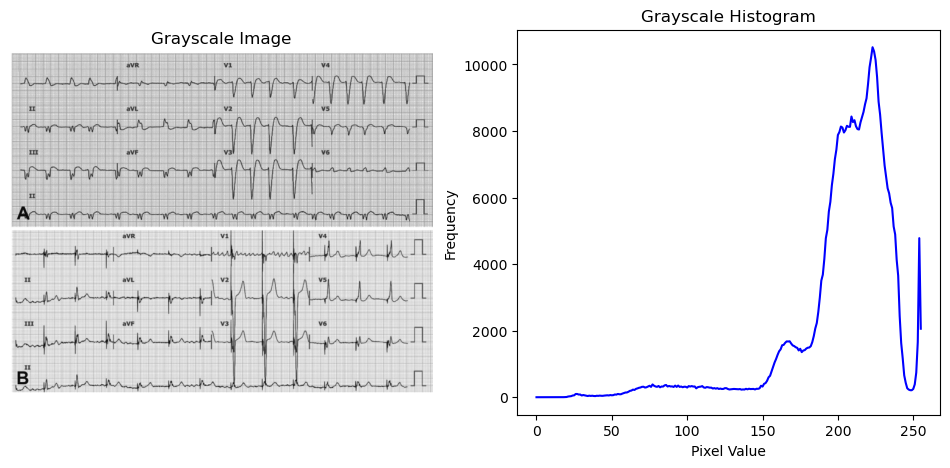

In [29]:
creating_img_info(imgs_paths[85287])[0]

In [33]:
calc_ratio_and_text_len_1(imgs_paths[85287])[0]

0.05

In [34]:
calc_ratio_and_text_len_2(imgs_paths[85287])[0]

0

In [25]:
calc_ratio_and_text_len_1('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC6446306/6446306_1/6446306_1_1.jpg')[0]

0.18

Total number of pixels: 274383
Number of pixels exeecding threshold: 2029
Ratio: 0.01
Text Length: 0


0.01

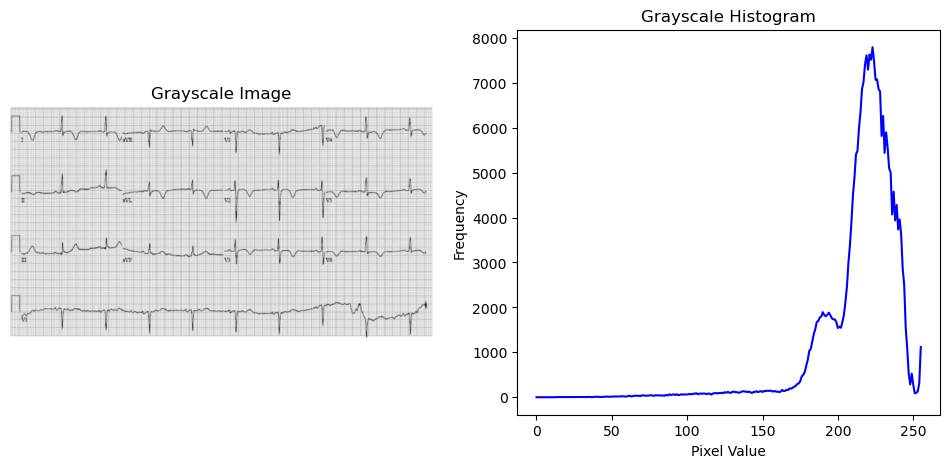

In [28]:
creating_img_info('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC6446306/6446306_1/6446306_1_1.jpg')[0]

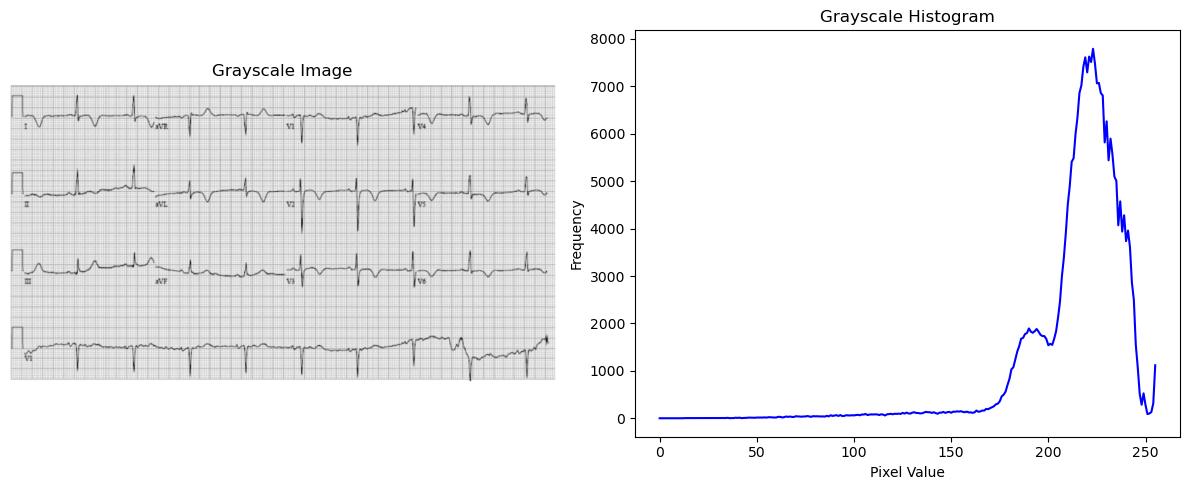

Total number of pixels: 274383
Number of pixels exeecding threshold: 2029
Ratio: 0.01
Text Length: 0


(<PIL.Image.Image image mode=L size=709x387>, '', 0.01)

In [120]:
creating_img_info('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC6446306/6446306_1/6446306_1_1.jpg', 250)


In [121]:
!cat /cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC6446306/6446306_1/6446306_1_1.txt

Electrocardiogram revealing sinus rhythm with normal axis, and diffuse T wave inversions in leads V2 to V6

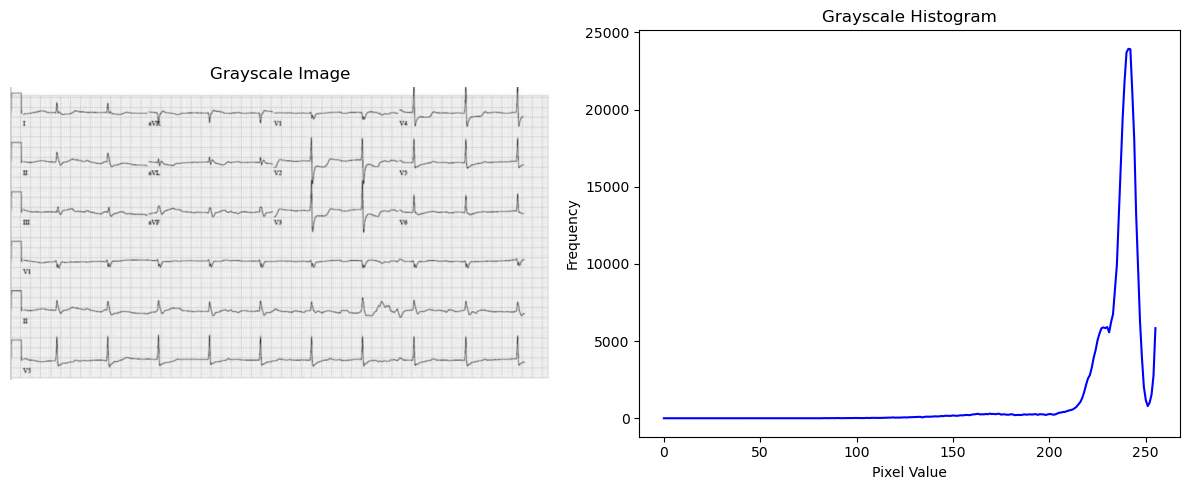

Total number of pixels: 346400
Number of pixels exeecding threshold: 13118
Ratio: 0.04
Text Length: 68


(<PIL.Image.Image image mode=L size=800x433>,
 'le uw va\n\n=\n\nNe Ni a fuel inauet\nfe 5\n\nfe = a =\n\n5\n\naoa 9a a eo\n\n|\n\n',
 0.04)

In [117]:
creating_img_info('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8270598/8270598_1/8270598_1_1.jpg', 250)


In [122]:
!cat /cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC8270598/8270598_1/8270598_1_1.txt

The initial electrocardiogram demonstrates ST-segment elevation in aVR and ST-segment depression in precordial leads V2 to V4.

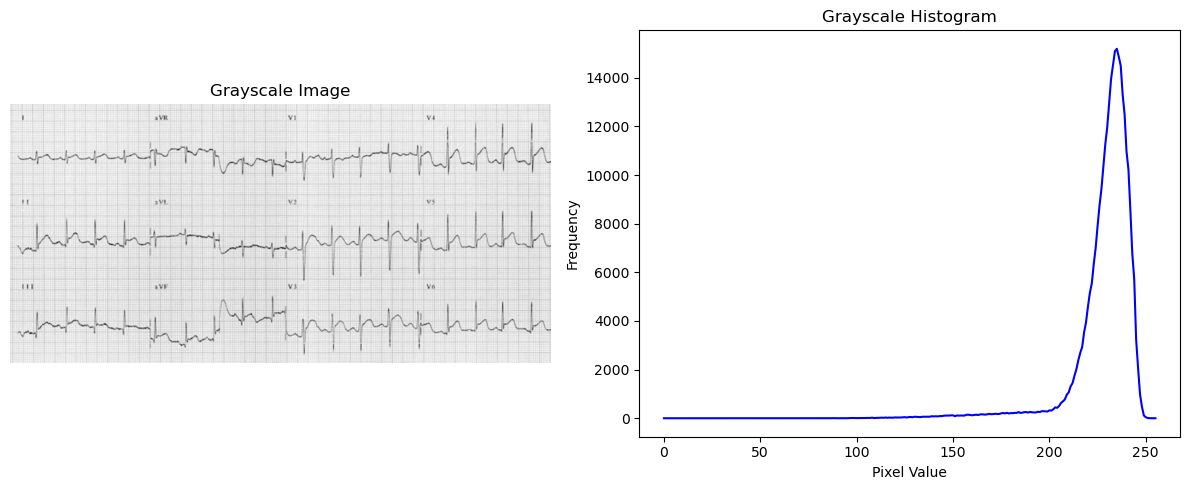

Total number of pixels: 304836
Number of pixels exeecding threshold: 52
Ratio: 0.0
Text Length: 27


(<PIL.Image.Image image mode=L size=798x382>,
 'f on ” cette ee\n\nee ma ee\n\n',
 0.0)

In [116]:
creating_img_info('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC4342780/4342780_1/4342780_1_2.jpg', 250)


In [123]:
!cat /cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC4342780/4342780_1/4342780_1_2.txt

Electrocardiogram performed at admission during recurrent chest pain showing a marked ST-segment elevation in the left precordial leads V4-V6 and in the inferior leads II, III, and aVF and ST-segment depression in aVR lead.

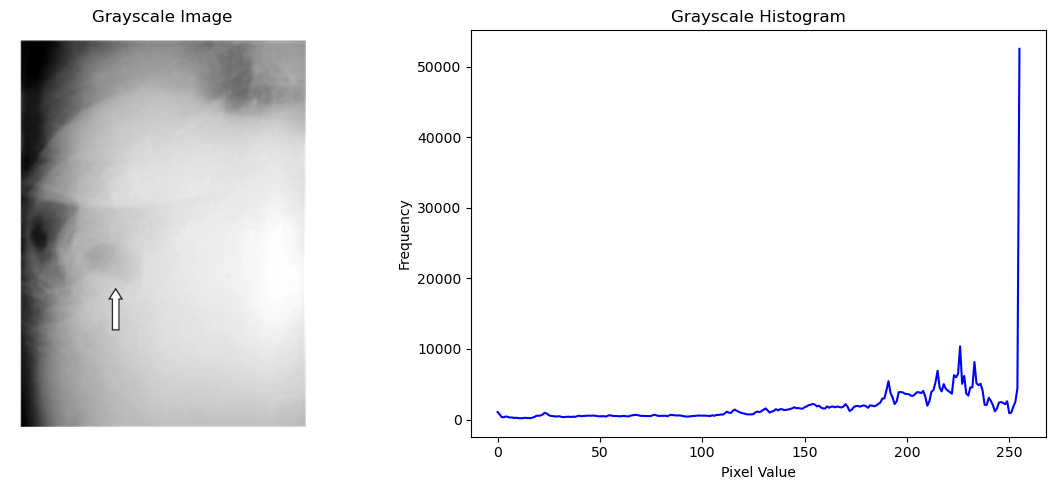

Total number of pixels: 479400
Number of pixels exeecding threshold: 63129
Ratio: 0.13
Text Length: 0


(<PIL.Image.Image image mode=L size=600x799>, '', 0.13)

In [ ]:
creating_img_info('/cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC3707284/3707284_1/3707284_1_1.jpg', 250)


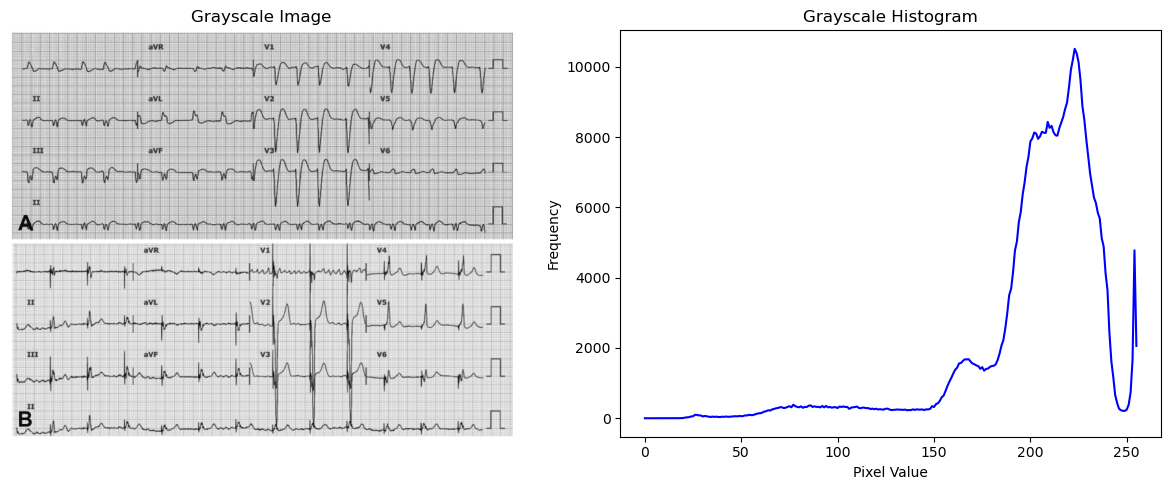

Total number of pixels: 483125
Number of pixels exeecding threshold: 9870
Ratio: 0.02
Text Length: 0


(<PIL.Image.Image image mode=L size=773x625>, '', 0.02)

In [111]:
creating_img_info(imgs_paths[85287], 250)

In [86]:
!cat /cs/labs/tomhope/yuvalbus/pmc/pythonProject/data2/PMC5599471/5599471_1/5599471_1_2.txt


a Low-power microscopy shows a lobulated cartilaginous neoplasm consisting of hyaline cartilage with areas of calcification (arrow; H&E, ×100). b High-power view of the tumor shows some variation in the size and shape of the cartilage cells and binuclear cells (H&E, ×400)

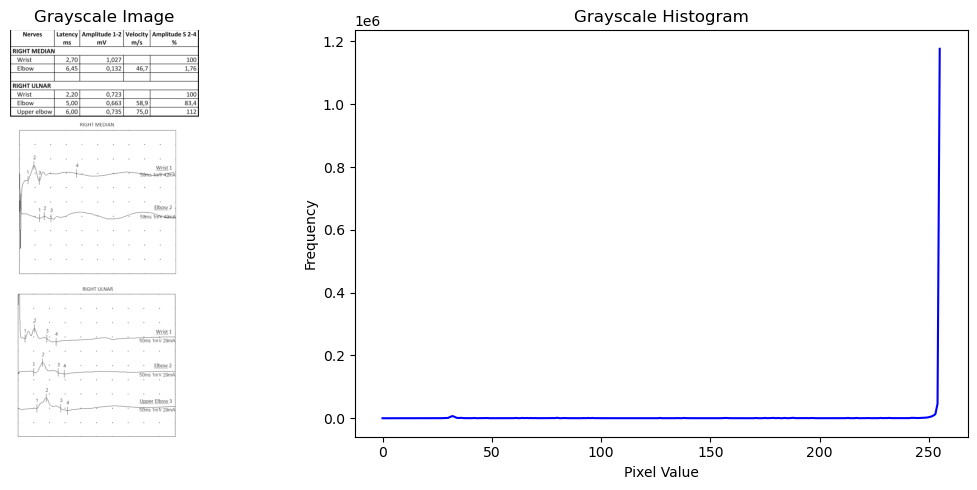

Total number of pixels: 1355112
Number of pixels exeecding threshold: 1252684
Ratio: 0.92
Text Length: 345


(<PIL.Image.Image image mode=L size=792x1711>,
 'Nerves Latency | Amplitude 1-2 | Velocity | Amplitude S 2-4\n\nms mV m/s %\nRIGHT MEDIAN\nWrist 2,70 1,027 100\nElbow 6,45 0,132 46,7 1,76\nRIGHT ULNAR\nWrist\nElbow\nUpper elbow\nRIGHT MEDIAN\n2\nmal\nElbow 2 |\nSome Tyan\nRIGHT ULNAR\n50ms 1mV 29mA)\n2\n1 + 34 " f i se * Elbow 2\n5Oms 1mV 29mA|\n. 2. . re . + + . .\n1 34 Upper Elbow 3\n. ~ % s . 50ms ImV¥ 29mAl\n\n',
 0.92)

In [81]:
creating_img_info(imgs_paths[89897], 250)

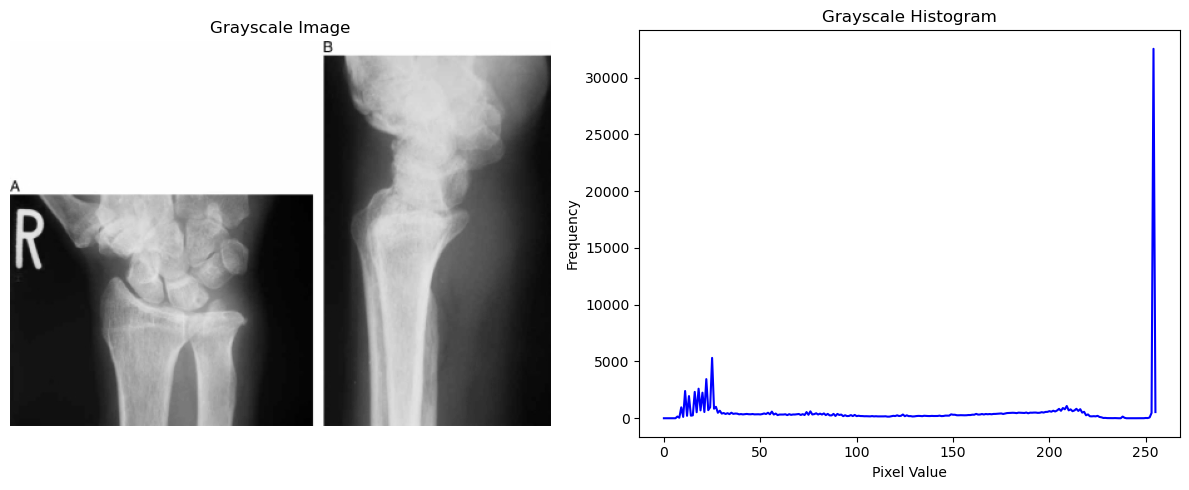

Total number of pixels: 132624
Number of pixels exeecding threshold: 33670
Ratio: 0.25
Text Length: 0


(<PIL.Image.Image image mode=L size=432x307>, '', 0.25)

In [65]:
creating_img_info(imgs_paths[8067], 250)

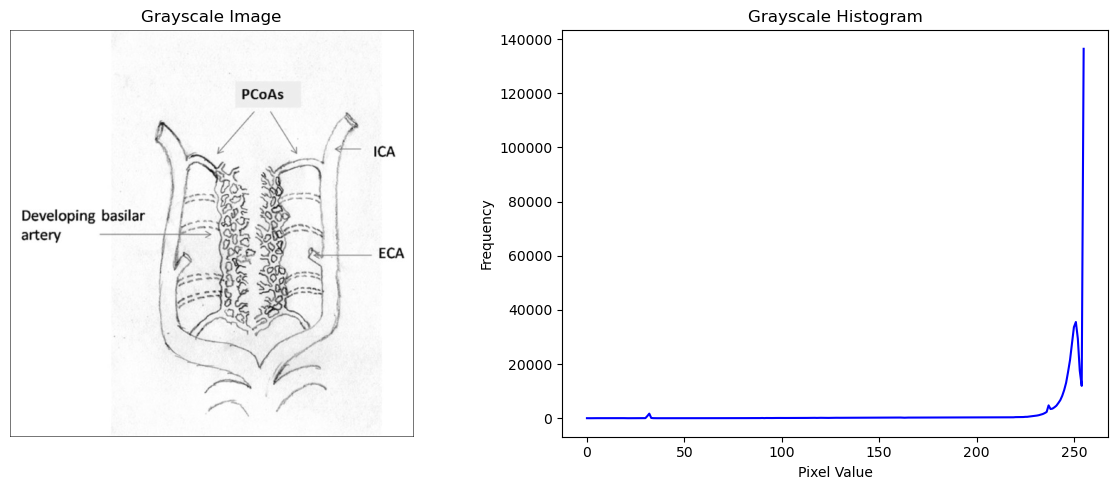

Total number of pixels: 449564
Number of pixels exeecding threshold: 264676
Ratio: 0.59
Text Length: 40


(<PIL.Image.Image image mode=L size=668x673>,
 'es\npo}\n3\noO\n2\n20\n&\nQ\n2\n$\nov\na\n\nc\nG\n£\nG\n\n',
 0.59)

In [60]:
creating_img_info(imgs_paths[17287], 250)

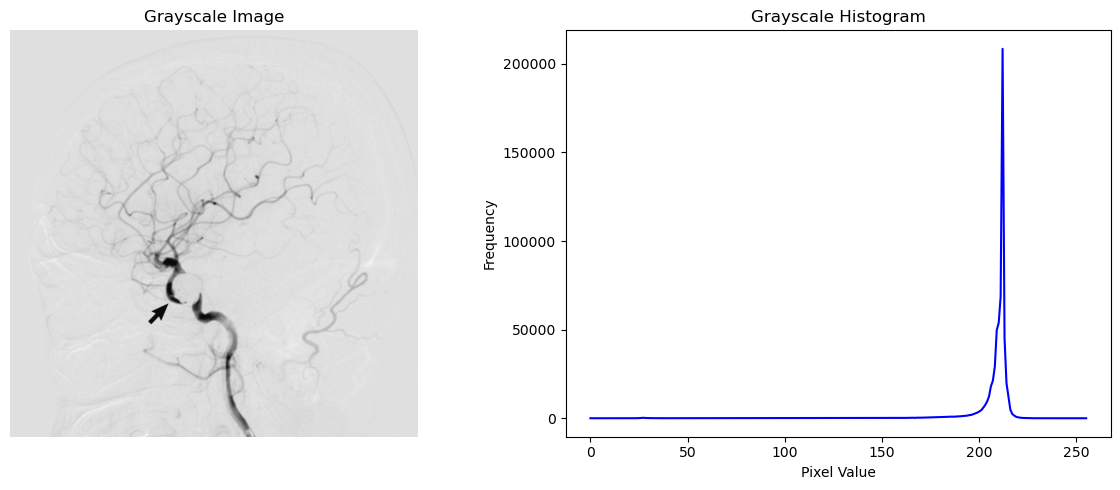

Total number of pixels: 622520
Number of pixels exeecding threshold: 0
Ratio: 0.0
Text Length: 0


(<PIL.Image.Image image mode=L size=790x788>, '', 0.0)

In [49]:
creating_img_info(imgs_paths[23050], 250)

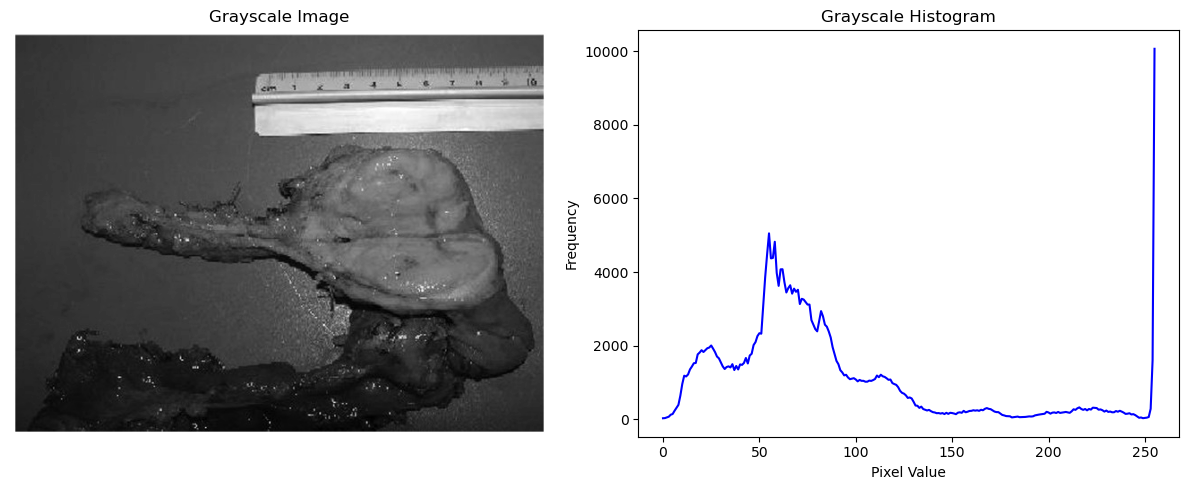

Total number of pixels: 273308
Number of pixels exeecding threshold: 12108
Ratio: 0.04
Text Length: 0


(<PIL.Image.Image image mode=L size=602x454>, '', 0.04)

In [50]:
creating_img_info(imgs_paths[48406], 250)

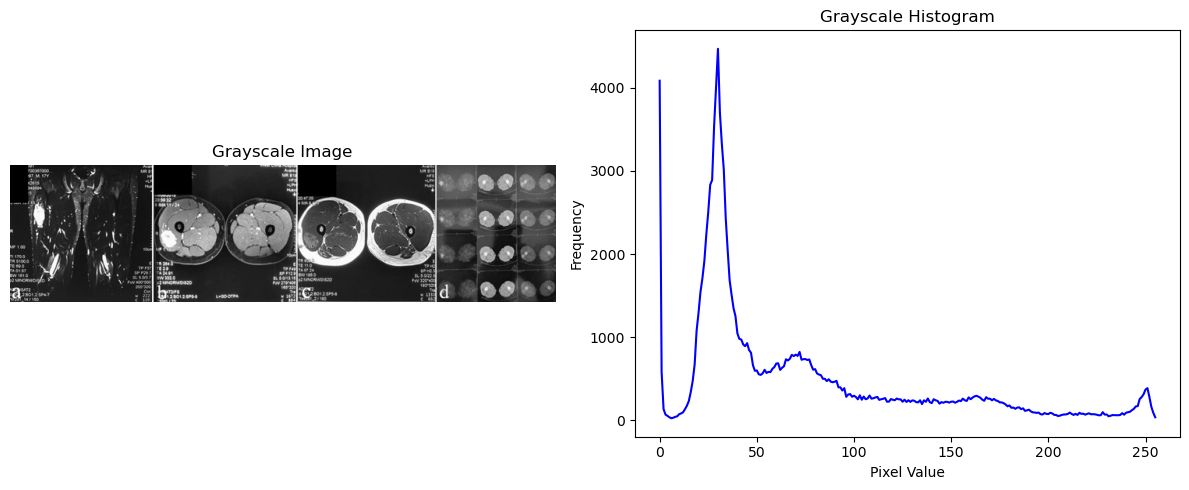

Total number of pixels: 123200
Number of pixels exeecding threshold: 1329
Ratio: 0.01
Text Length: 8


(<PIL.Image.Image image mode=L size=700x176>, '4 S@@86\n', 0.01)

In [61]:
creating_img_info(imgs_paths[94508], 250)

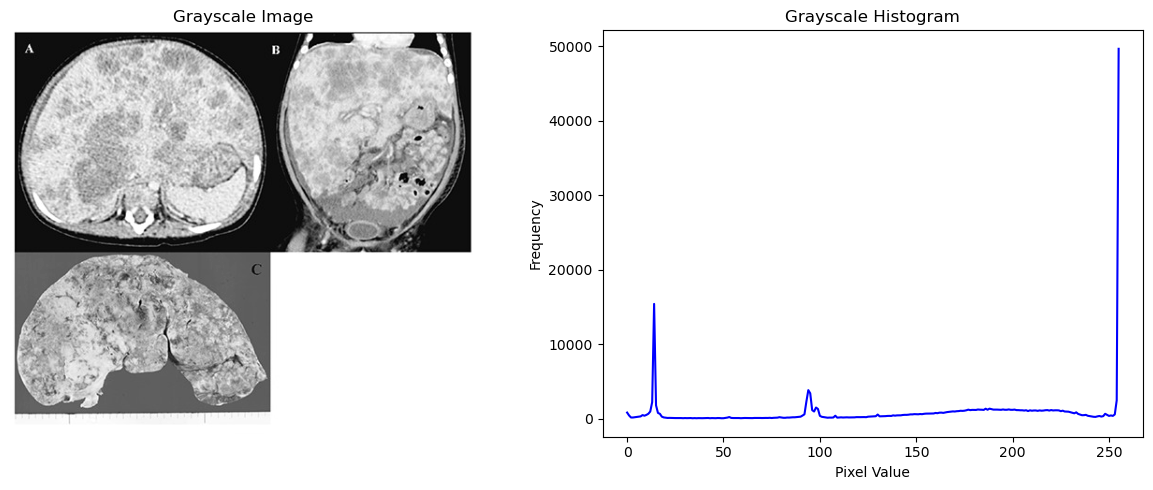

Total number of pixels: 217500
Number of pixels exeecding threshold: 53953
Ratio: 0.25
Text Length: 733


(<PIL.Image.Image image mode=L size=500x435>,
 '25> Eee\n\nBE\n\nBEE\n\n3:\n\nzz\n\n2B:\n\nERS\n\n=>\n\nRE\n\nEy\n\nEE\n\nri\n\nae\n\niz\n\nBS\n\nBRR\n\neb\n\n£8\n\n8\n\ncas\n\nEi:\n\n48\n\n£S\n\n32\n\n82\n\n233\n\n3\n\ni\n\ni\n\nsé\n\naa\n\n8\n\nBE\n\n134\n\nch\n\nni\n\n<To\n\nAl\n\nde\n\n|\n\neG\n\nWe\n\n= &\n\na\n\n054\n\nNY\n\nCork ee\n\neegeene\n\nEa\n\n£3\n\n£3\n\nBERSEE\n\ng3\n\n£8\n\nSEgREEEEEE\n\nBe85 885\n\nB282\n\nTr\n\ng8s8\n\n8538\n\nfhe\n\n=e\n\n5\n\nae\n\n25\n\nRES\n\ngees\n\n58\n\n38\n\nS222:\n\nBess\n\n£32\n\nBSse\n\ne\n\nes\n\nBs\n\n.\n\n883\n\nBegesssseeengaeas3s\n\nseas\n\nB82\n\nas\n\nSee\n\n25-\n\nEg\n\nES\n\ni\n\nTEERGE\n\niy\n\nEERE:\n\ni\n\n55\n\nge\n\nhee\n\n&S\n\nes\n\nBe\n\n88\n\nas\n\n28\n\ngs\n\ng508285\n\n86\n\n22\n\nBeeeo\n\nPEL\n\nbE\n\nGaai\'t?\n\nH\n\n2\n\n1s\n\nnlHiln\n\nWhe:\n\n&\n\n084\n\ni"\n\nes\n\nSEERES\n\nprrerrerrrrry\n\nPrers\n\nRS\n\npres\n\nHs\n\nBe\n\nS232\n\n58\n\nEEE\n\nR58\n\naEcEEEE\n\n£28\n\ne223\n\n&$\n\n5S\n\nBad\n\nBess\n\n88\n\nB

In [58]:
creating_img_info(imgs_paths[57627], 250)

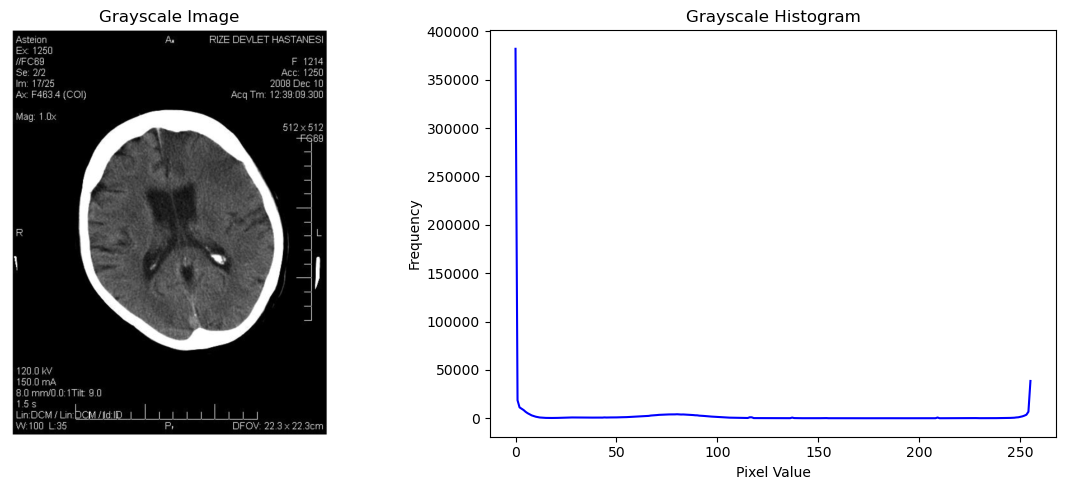

Total number of pixels: 709446
Number of pixels exeecding threshold: 55481
Ratio: 0.08
Text Length: 291


(<PIL.Image.Image image mode=L size=746x951>,
 'Asteion An RIZE DEVLET HASTANES!|\nEx 1260\n\nHPCBS F 1214\n\nSe: 2/2 Ace: 1250\n\nImi: 17/25 2008 Dec 10\n\nAx. F463.4 (CON Acq Tm: 12:39:09.300\nMag: 1.0x\n\n512x612\n\nG69\n\nR oe\n\n120.0 kv\n\n150.0 mA\n\n8.0 mm/0.0:1Tilt: 9.0\n\n15s\n\nLin;:DCM / Lin:DOM fild:ID_ | |_| | J a\n\nW100 L:36 Pr DFOV: 22.3 x 22.3cm\n\n',
 0.08)

In [62]:
# Many words, but still shouldn't be filtered
creating_img_info(imgs_paths[95661], 250)

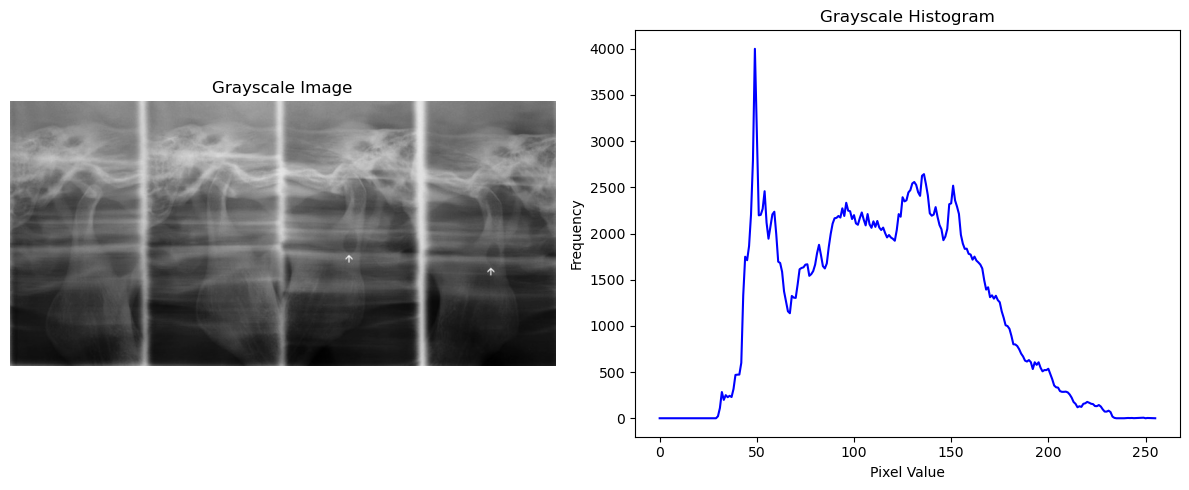

Total number of pixels: 292552
Number of pixels exeecding threshold: 6
Ratio: 0.0
Text Length: 0


(<PIL.Image.Image image mode=L size=776x377>, '', 0.0)

In [63]:
creating_img_info(imgs_paths[], 250)

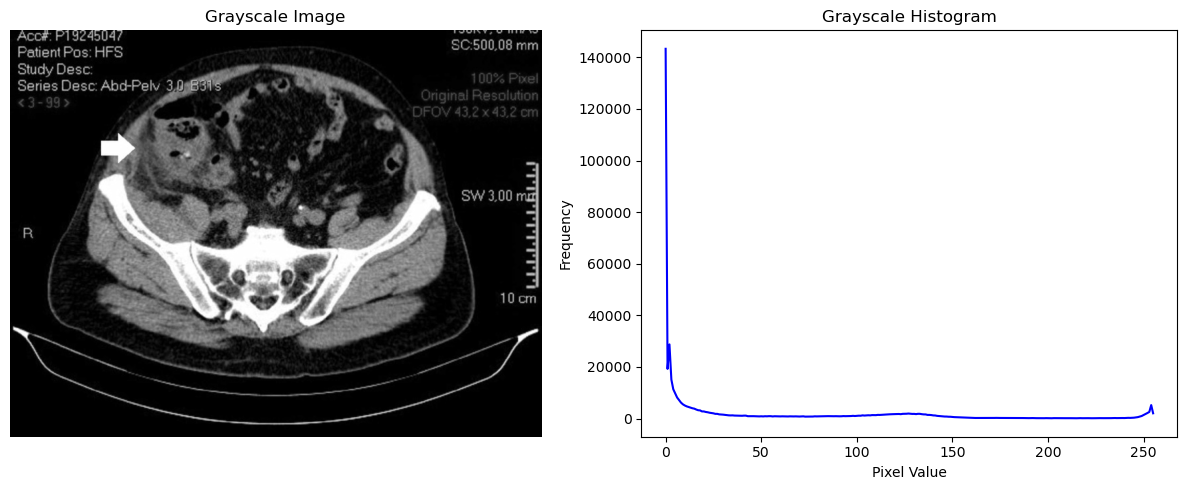

Total number of pixels: 489600
Number of pixels exeecding threshold: 15018
Ratio: 0.03
Text Length: 103


(<PIL.Image.Image image mode=L size=800x612>,
 'Acc#: P19¢4304/ bteats os\nPatient Pos: HFS SC:500,08 mm\nStudy Desc:\n\nSeries Desc: Abd-Pelv 3.0985\n\not\n\n',
 0.03)

In [66]:
creating_img_info(imgs_paths[147525], 250)

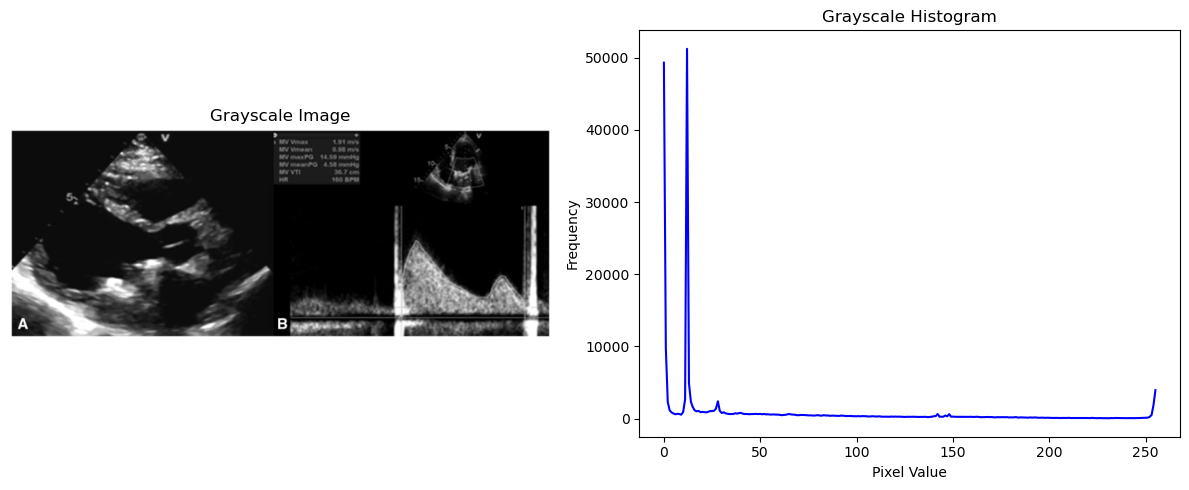

Total number of pixels: 219705
Number of pixels exeecding threshold: 6820
Ratio: 0.03
Text Length: 0


(<PIL.Image.Image image mode=L size=755x291>, '', 0.03)

In [67]:
creating_img_info(imgs_paths[149830], 250)

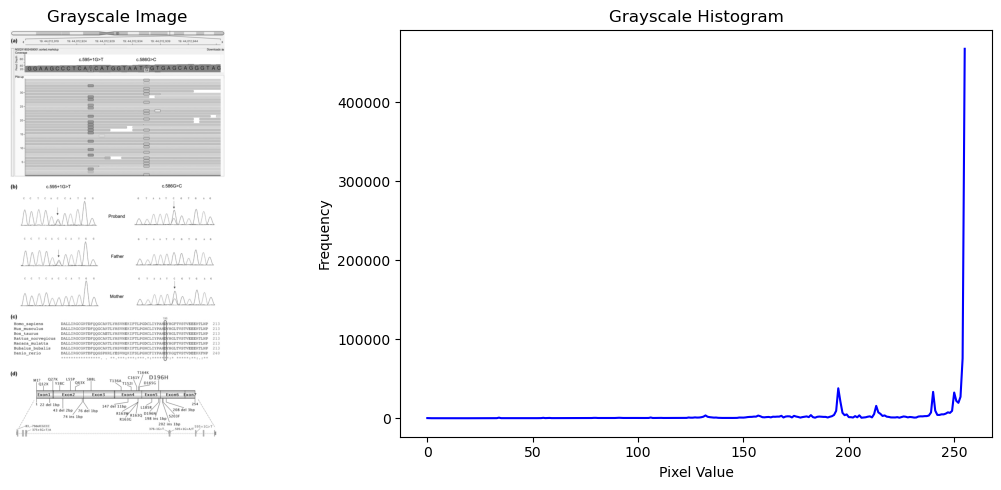

Total number of pixels: 1066500
Number of pixels exeecding threshold: 645210
Ratio: 0.6
Text Length: 916


(<PIL.Image.Image image mode=L size=750x1422>,
 "¢.595+1G>T\n\n(b) 6,595+1G>T ©.\n\n/ ' Proband\n| { /\\ /\\ Father\np / | / i Mother\n\n(c)\nHomo_sapiens\nMus_musculus\nBos_taurus\n\nMacaca_mulatta\n\nBubalus_bubalis\nDanio_rerio\n\n(4)\n\nmi?\n\n‘1 22 del\n\n/-83_-TedeIcacee\n\ncome\n\n586G>C\n\nree re a\n\n6\n\nnatin\nanil\naafi\\nal\\\\n\n\n196\nDALLIRGCGRTDF QOGCAKTLYHSVHEKIFTLPGDCLIYPAHWHGFTVSTVEEERTLNP 213\nDALLIRGCGRTDF QOGCAKTLYHSVHEKIFTLPGNCLIYPAHDWHGLIVSTVEEERTLNP 213\nDALLIRGCGRTDFQQGCAETLYHSVHEKIFTLPGNCLIYPAHDWHGLIVSTVEEERTLNP 213\nRattus_norvegicus DALLIRGCGRTDFQQGCAKTLYHSVHEKIFTLPGNCLIYPAHDWHGLTVSTVEEERTLNP 213\nDALLIRGCGRTDFQOGCAKTLYHSVHEKIFTLPGDCLIYPAHDWHGFTVSTVEEERTLNP 213\nDALLIRGCGRTDFQQGCAKTLYHSVHEKIFTLPGNCLIYPAHDWHGLIVSTVEEERTLNP 213\nDALLIRGCGRTDFQOGSPHRLYESVHOKIFSLPGHCF 1YPAHDWKGOTVSTVDEEKKFNP 240\n164K\nQ27K LSSP_ | S8BL\ny3sc | Q63x\nbe 147 del 11bp ook\n43 del 2bp /76 del lbp 208 del 3bp\n74 ins 1bp S203F\n202 ins 1bp. x\n376-1G>T | _sossiceast 991° T\n\nor 3

In [70]:
creating_img_info(imgs_paths[145219], 250)

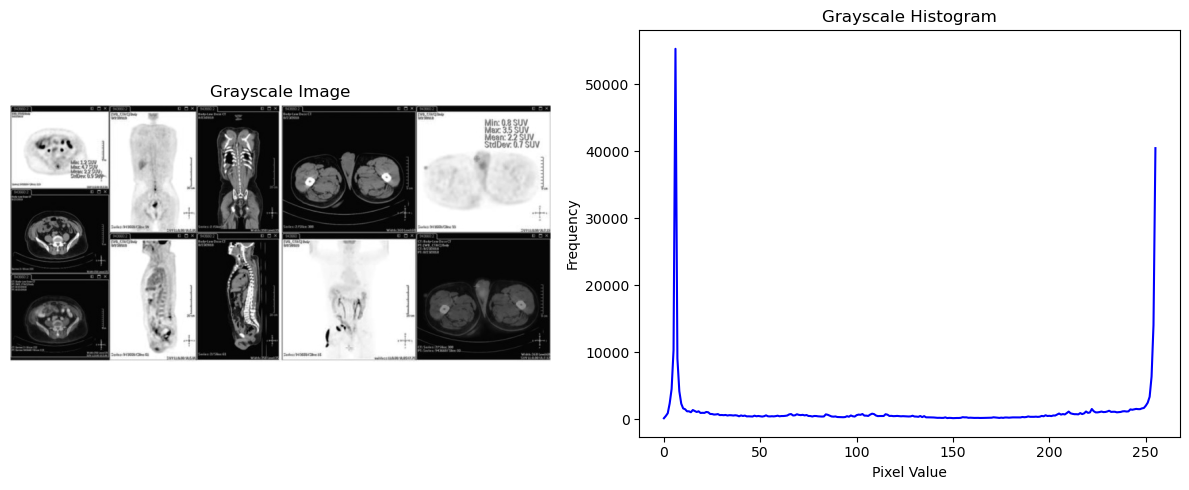

Total number of pixels: 303200
Number of pixels exeecding threshold: 68764
Ratio: 0.23
Text Length: 0


(<PIL.Image.Image image mode=L size=800x379>, '', 0.23)

In [78]:
creating_img_info(imgs_paths[137152], 250)

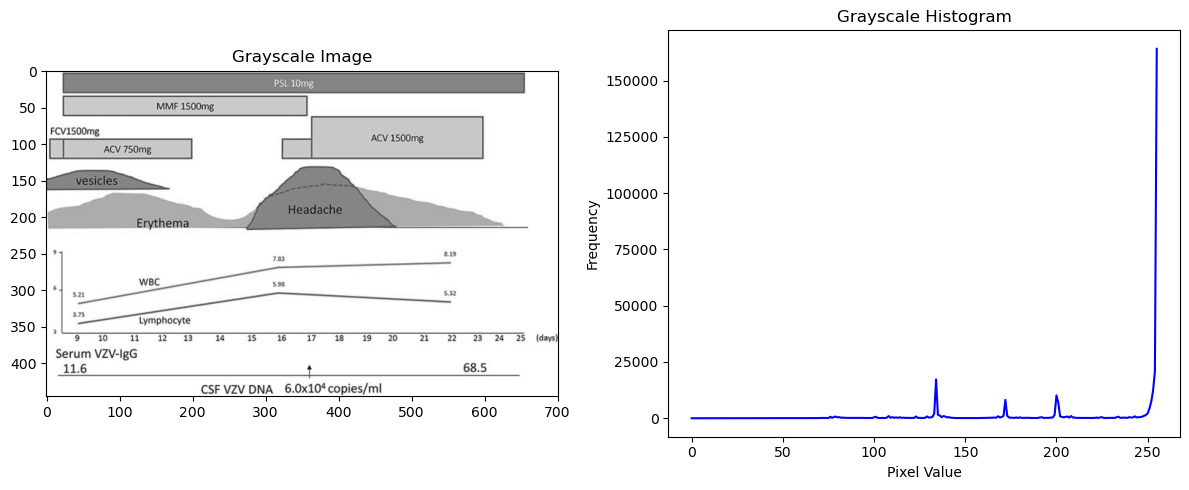

Total number of pixels: 312646
Number of pixels exeecding threshold: 211475
Ratio: 0.68
Text Length: 96


(<PIL.Image.Image image mode=L size=701x446>,
 '‘ wec, $90\nsa 32\nas enon\nee a a CC Ce)\nSerum VZV-IgG\n11.6 ¢ 68.5\n\nCSF VZV DNA 6.0x10‘ copies/ml\n',
 0.68)

In [43]:
creating_img_info(imgs_paths[171730], 250)

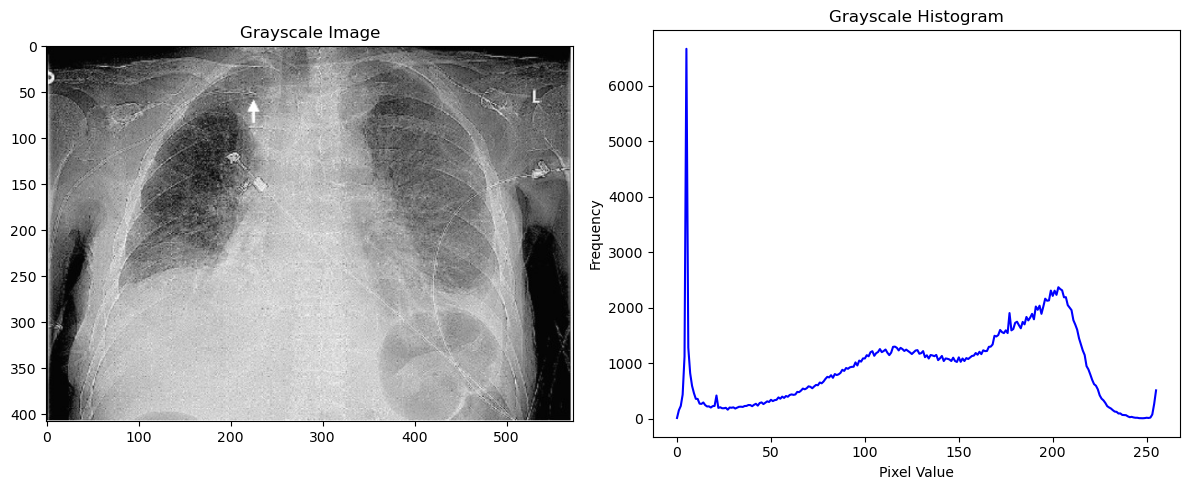

Total number of pixels: 233784
Number of pixels exeecding threshold: 926
Ratio: 0.0
Text Length: 0


(<PIL.Image.Image image mode=L size=573x408>, '', 0.0)

In [44]:
creating_img_info(imgs_paths[168272], 250)

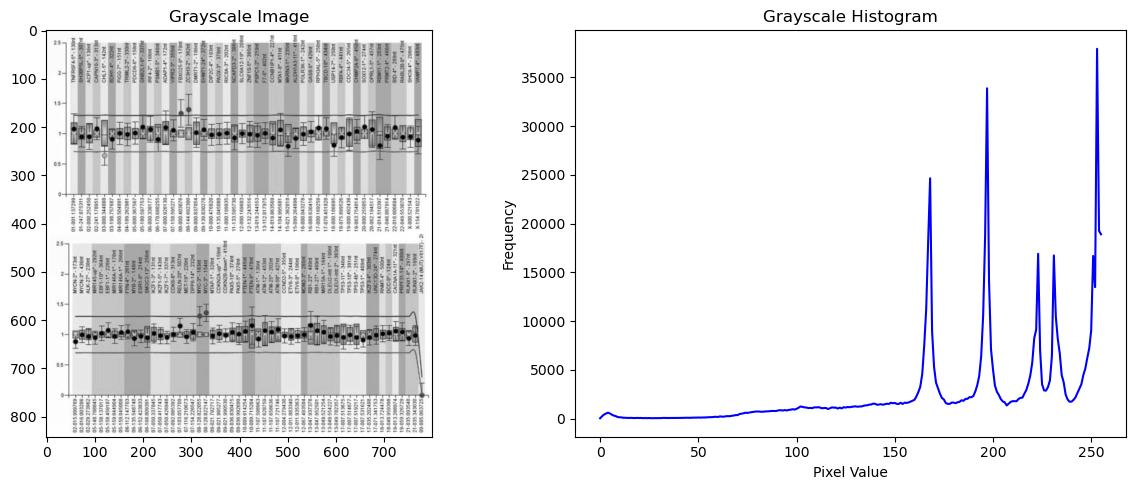

Total number of pixels: 673600
Number of pixels exeecding threshold: 115288
Ratio: 0.17
Text Length: 297


(<PIL.Image.Image image mode=L size=800x842>,
 "bh sz1290500'80\n\n‘Oc0cre sc0-1z\n\nW902 “6 4-24¥99S\n\nwore -.£xove\nWe64 --¥-92dI0\n\nWw9ek -.2°41aINO\n\nWea -.2-0HE97\nW621 .6-$20x85\n\nWELb-artavOY\nwore -.o-4ansd 0\nW99K-.2-FH 90\n90\nWasi -~9-9090d 90\nWuoce =e 90\nWISh-.L-90ld 30\n30\n30\n50\n30\n20\n> Mesto u¥e-10 20\n\nE ‘662101 400-10 3 ss\n\nT T T a « a = Ay .\n",
 0.17)

In [39]:
creating_img_info(imgs_paths[146373], 250)

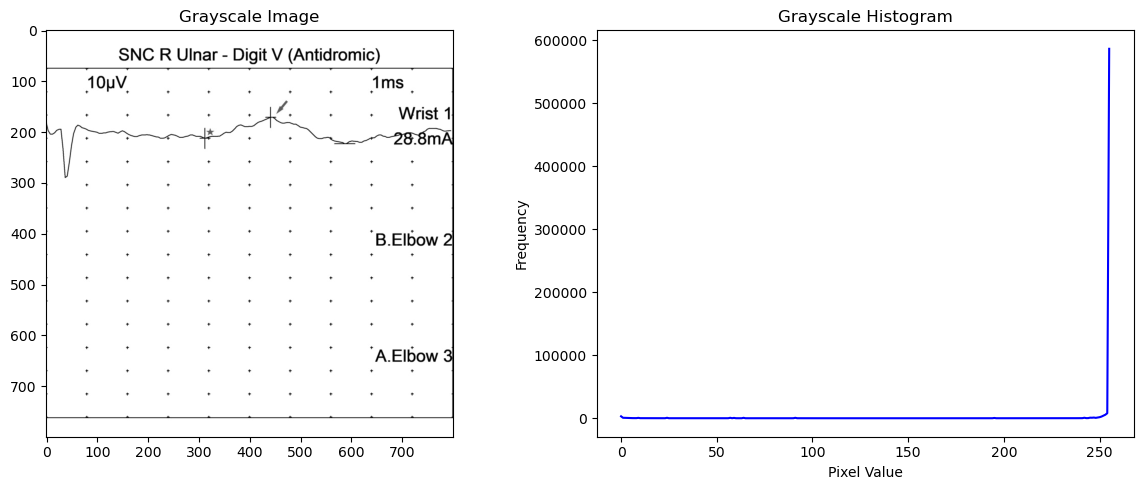

Total number of pixels: 640000
Number of pixels exeecding threshold: 608319
Ratio: 0.95
Text Length: 86


(<PIL.Image.Image image mode=L size=800x800>,
 'SNC R Ulnar - Digit V (Antidromic)\n\n410yV.\n\nf\n\nAms |\nWrist 1\n\n“B.Elbow 2\n\n“A.Elbow 3\n\n',
 0.95)

In [40]:
creating_img_info(imgs_paths[150983], 250)

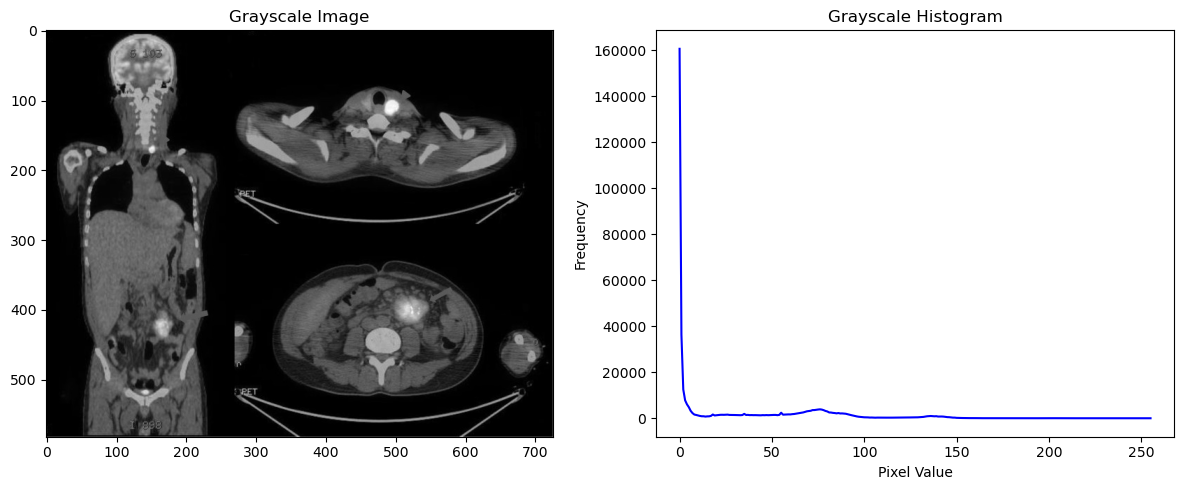

Total number of pixels: 421950
Number of pixels exeecding threshold: 0
Ratio: 0.0
Text Length: 0


(<PIL.Image.Image image mode=L size=725x582>, '', 0.0)

In [41]:
creating_img_info(imgs_paths[167119], 250)

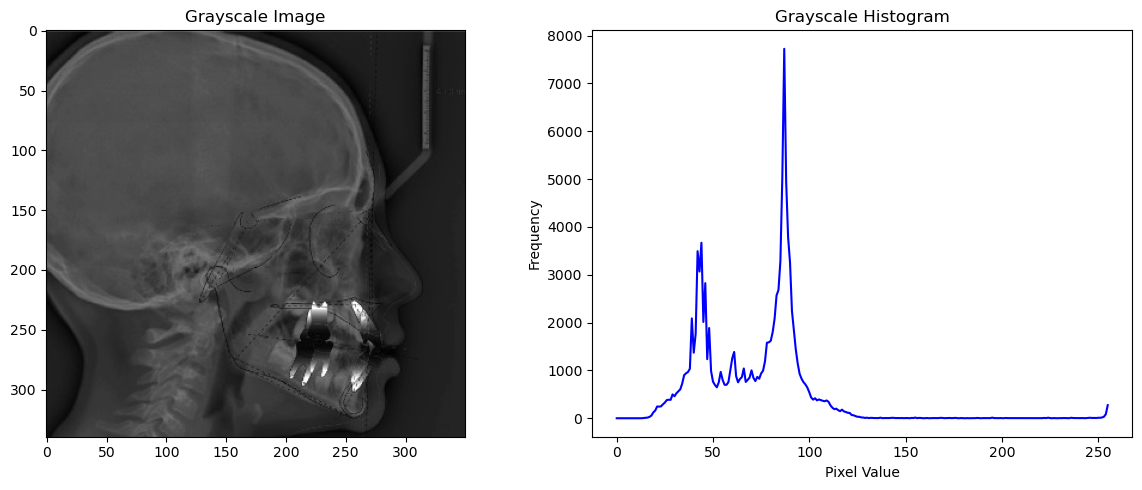

Total number of pixels: 119000
Number of pixels exeecding threshold: 426
Ratio: 0.0
Text Length: 0


(<PIL.Image.Image image mode=L size=350x340>, '', 0.0)

In [42]:
creating_img_info(imgs_paths[159051], 250)

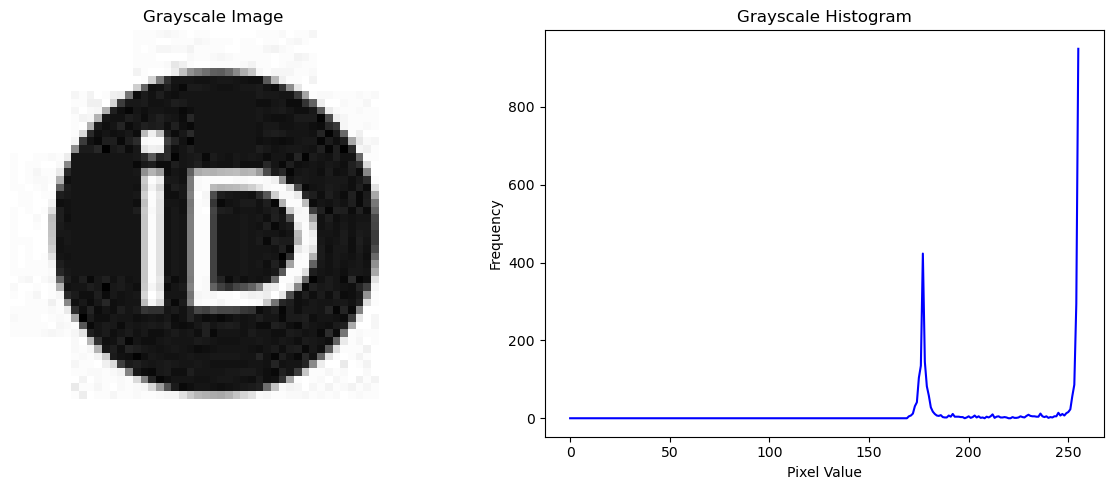

Total number of pixels: 2809
Number of pixels exeecding threshold: 1425
Ratio: 0.51
Text Length: 0


(<PIL.Image.Image image mode=L size=53x53>, '', 0.51)

In [77]:
creating_img_info(imgs_paths[154441], 250)


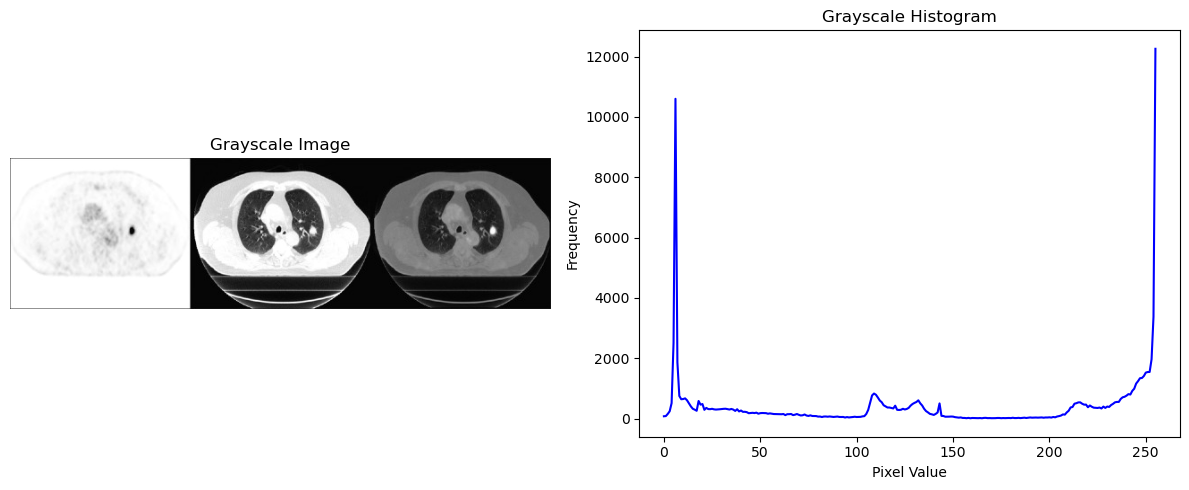

Total number of pixels: 101640
Number of pixels exeecding threshold: 22224
Ratio: 0.22
Text Length: 0


(<PIL.Image.Image image mode=L size=605x168>, '', 0.22)

In [76]:
creating_img_info(imgs_paths[182103], 250)


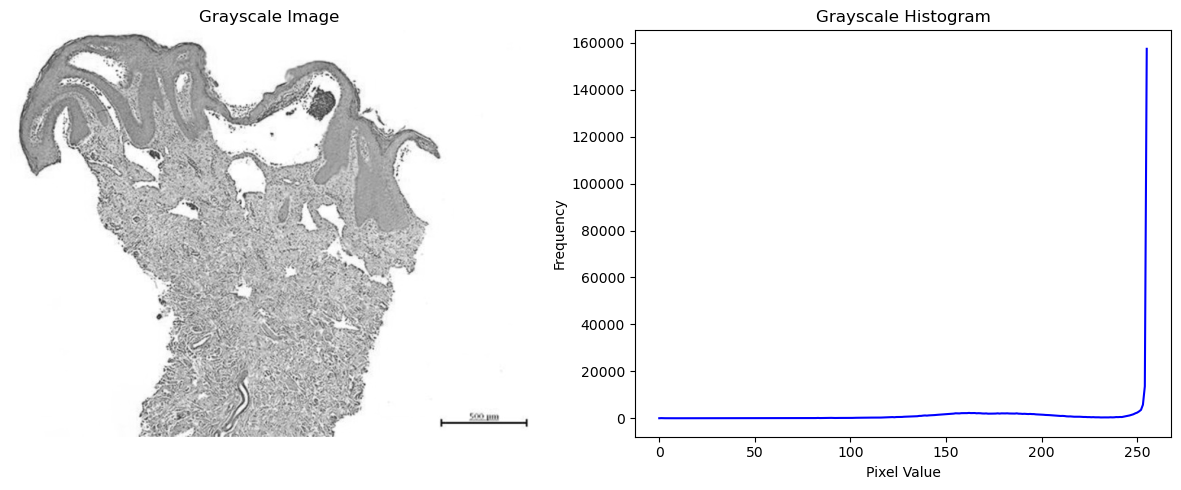

Total number of pixels: 362440
Number of pixels exeecding threshold: 185713
Ratio: 0.51
Text Length: 0


(<PIL.Image.Image image mode=L size=680x533>, '', 0.51)

In [75]:
creating_img_info(imgs_paths[40339], 250)


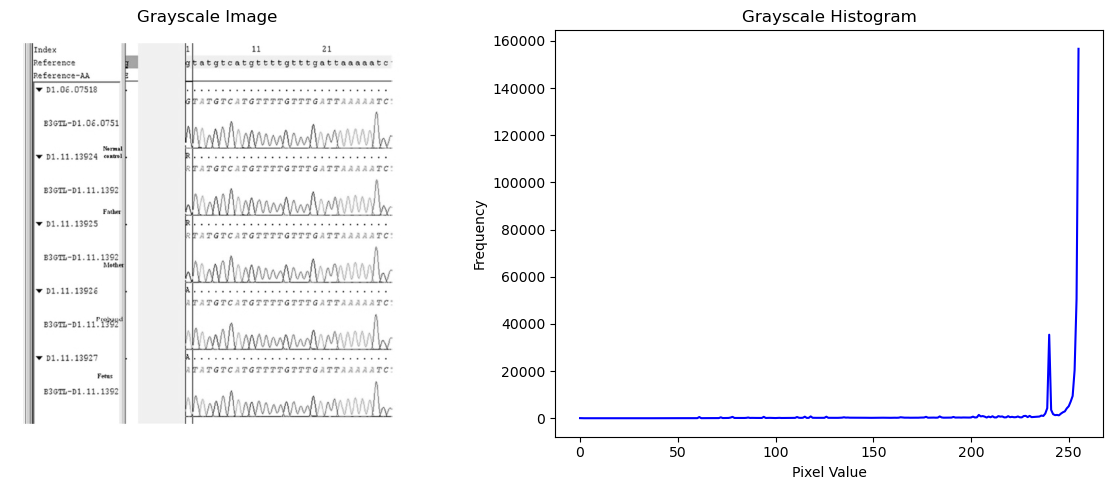

Total number of pixels: 370200
Number of pixels exeecding threshold: 249112
Ratio: 0.67
Text Length: 412


(<PIL.Image.Image image mode=L size=600x617>,
 'index\n\nlpeference @\nlreference-Aa\n\na a\nbkatgtcatgttttgtttgatt\n\nfw pi.0¢.07518\n\nB3GTb-D1.06.0751.\n\nNormal\nJy D1.11.13024 cnet\n\nB3GTL-D1.11.1362\n\nashe\nJw pi.11.13925\n\nB3GTL-D1.11.1392\n‘other\n\nlw pi.11.13926\nBaomn-p1.11" 928\nlw pi.11.13927\n\nFens\n\nB3GT-D1.11.1362\n\nbharercarerrrrerrrGarraaaaa\n\nFATGTCATGTTTTGTTTGATTAAAAA\n\nATG TCATGTITIGTITGATTAARAR\n\nPATGTCATGTTTTGTTTGATTAAAAR\n\nw/t anil by\n\nrer\n\nre!\n\nret\n\nnc:\n\nrec\n\n',
 0.67)

In [74]:
creating_img_info(imgs_paths[33424], 250)


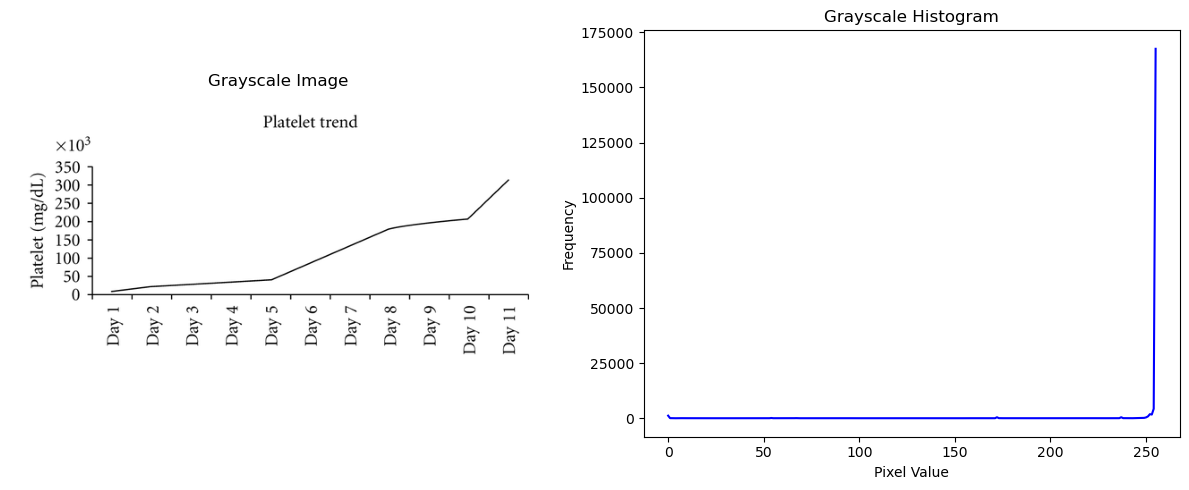

Total number of pixels: 186600
Number of pixels exeecding threshold: 176631
Ratio: 0.95
Text Length: 124


(<PIL.Image.Image image mode=L size=600x311>,
 'Platelet trend\n\nx10?\n\na!\nBSRSRS=S\nBS8aee\n\n(1p/8ur) [IIa\n\n11 Aeq\nor Aeq\n6 Ae,\ng deq\nLea\n9 deg\n¢ Aeq,\n7 keq\n¢ Ae\nz deg\n\n1 Aeq\n',
 0.95)

In [73]:
creating_img_info(imgs_paths[19593], 250)


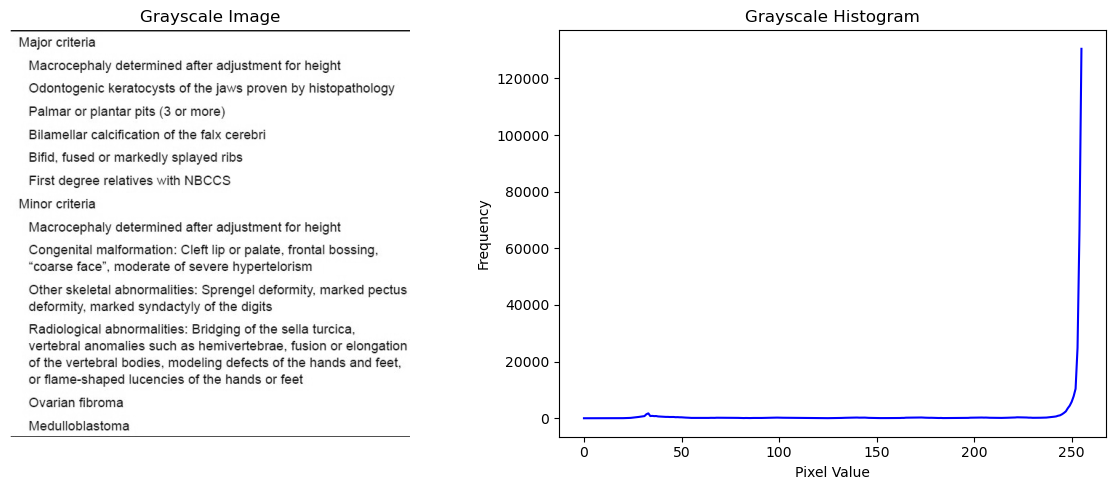

Total number of pixels: 307450
Number of pixels exeecding threshold: 246187
Ratio: 0.8
Text Length: 837


(<PIL.Image.Image image mode=L size=550x559>,
 'Major criteria\nMacrocephaly determined after adjustment for height\nOdontogenic keratocysts of the jaws proven by histopathology\nPalmar or plantar pits (3 or more)\nBilamellar calcification of the falx cerebri\nBifid, fused or markedly splayed ribs\nFirst degree relatives with NBCCS\nMinor criteria\nMacrocephaly determined after adjustment for height\n\nCongenital malformation: Cleft lip or palate, frontal bossing,\n“coarse face”, moderate of severe hypertelorism\n\nOther skeletal abnormalities: Sprengel deformity, marked pectus\ndeformity, marked syndactyly of the digits\n\nRadiological abnormalities: Bridging of the sella turcica,\nvertebral anomalies such as hemivertebrae, fusion or elongation\nof the vertebral bodies, modeling defects of the hands and feet,\nor flame-shaped lucencies of the hands or feet\n\nOvarian fibroma\nMedulloblastoma\n\n',
 0.8)

In [72]:
creating_img_info(imgs_paths[30000], 250)

In [26]:
image

array([[251, 216, 183, ..., 208, 213, 206],
       [241, 202, 192, ..., 194, 211, 221],
       [213, 183, 184, ..., 183, 195, 201],
       ...,
       [207, 224, 213, ..., 207, 205, 206],
       [220, 247, 225, ..., 201, 202, 209],
       [236, 231, 207, ..., 198, 205, 224]], shape=(480, 600), dtype=uint8)

In [21]:
559*550

307450

In [28]:
480*600

288000